In [1]:
!pip install gdown -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
!gdown 1w-v21oV4KEmOC5n7HJTexpeo2iVzKwsf

Downloading...
From: https://drive.google.com/uc?id=1w-v21oV4KEmOC5n7HJTexpeo2iVzKwsf
To: /content/Map1.rar
100% 448M/448M [00:02<00:00, 215MB/s]


***

**Decompression data**

***






In [3]:
!mkdir Data && unrar x Map1.rar ./Data

Streaming output truncated to the last 5000 lines.
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_047.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_156.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_264.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_373.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_483.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_589.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_696.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_807.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_00_913.jpg      84%  OK 
Extracting  ./Data/TrainningData/IMG/right_2022_12_14_10_17_01_021.jpg      84%  OK 
Extractin

***

**Process directory in google drive**

***

In [4]:
%cd Data/TrainningData/IMG

/content/Data/TrainningData/IMG


***

**Split data (images) to corresponding folder**

***

In [5]:
!mkdir {left,center,right} && mv left_* left; mv center_* center; mv right_* right
!ls ./left | wc -l

11090


***

**Import necessary libraries**

***

In [6]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from imgaug import augmenters as iaa

In [7]:
# Set column name.
pd.set_option('display.max_colwidth',None)
driving_log=pd.read_csv('../driving_log.csv',names=['center','left','right','steering_angle','throttle','break','speed'])
driving_log.head(1)

,center,left,right,steering_angle,throttle,break,speed
0,E:\0 Univer\Junior\ML\Assign\FinalReport\EntireProject\TrainningData\IMG\center_2022_12_14_10_05_54_547.jpg,E:\0 Univer\Junior\ML\Assign\FinalReport\EntireProject\TrainningData\IMG\left_2022_12_14_10_05_54_547.jpg,E:\0 Univer\Junior\ML\Assign\FinalReport\EntireProject\TrainningData\IMG\right_2022_12_14_10_05_54_547.jpg,0.0,0.0,0.0,0.000078


In [8]:
# Change data (images) path
path='E:\\0 Univer\\Junior\\ML\\Assign\\FinalReport\\EntireProject\\TrainningData\\IMG\\'

for column in ['center','left','right']:
  driving_log[column]=driving_log[column].str.replace(path,f'{column}/',regex=False).str.strip()
driving_log.head()

,center,left,right,steering_angle,throttle,break,speed
0,center/center_2022_12_14_10_05_54_547.jpg,left/left_2022_12_14_10_05_54_547.jpg,right/right_2022_12_14_10_05_54_547.jpg,0.0,0.000000,0.0,0.000078
1,center/center_2022_12_14_10_05_54_661.jpg,left/left_2022_12_14_10_05_54_661.jpg,right/right_2022_12_14_10_05_54_661.jpg,0.0,0.000000,0.0,0.000078
2,center/center_2022_12_14_10_05_54_766.jpg,left/left_2022_12_14_10_05_54_766.jpg,right/right_2022_12_14_10_05_54_766.jpg,0.0,0.000000,0.0,0.000078
3,center/center_2022_12_14_10_05_54_876.jpg,left/left_2022_12_14_10_05_54_876.jpg,right/right_2022_12_14_10_05_54_876.jpg,0.0,0.000000,0.0,0.000079
4,center/center_2022_12_14_10_05_54_980.jpg,left/left_2022_12_14_10_05_54_980.jpg,right/right_2022_12_14_10_05_54_980.jpg,0.0,0.299873,0.0,0.252337


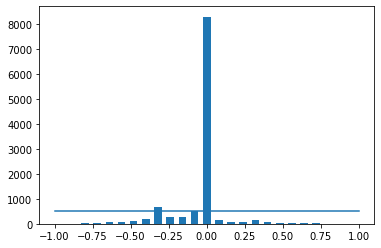

In [10]:
# Plot histogram
hist,bins=np.histogram(driving_log['steering_angle'],bins=25)
plt.bar(0.5*(bins[:-1]+bins[1:]),hist,width=0.05)
plt.plot((np.min(driving_log['steering_angle']),np.max(driving_log['steering_angle'])),(500,500))
plt.show()

In [11]:
# Handle imbalance data
from sklearn.utils import shuffle
remove=[]
for i in range(25):
  left=[]
  for j in range(len(driving_log['steering_angle'])):
    if driving_log['steering_angle'][j]>=bins[i] and driving_log['steering_angle'][j]<=bins[i+1]:
      left.append(j)
  left=shuffle(left)
  left=left[500:]
  remove.extend(left)

driving_log.drop(driving_log.index[remove],inplace=True)

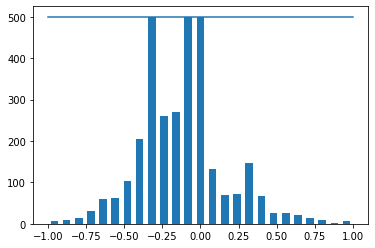

In [13]:
hist,bins=np.histogram(driving_log['steering_angle'],bins=25)
plt.bar(0.5*(bins[:-1]+bins[1:]),hist,width=0.05)
plt.plot((np.min(driving_log['steering_angle']),np.max(driving_log['steering_angle'])),(500,500))
plt.show()

In [14]:
def adjust_brightness(image):
  brightness=iaa.Multiply((0.2,1.2))
  image=brightness.augment_image(image)
  return image

In [15]:
def shift_image(image,steering_angle,x_range=[-60,60],y_range=[-20,20]):
  height,width=(image.shape[0],image.shape[1])
  x_shift=np.random.randint(x_range[0],x_range[1])
  y_shift=np.random.randint(y_range[0],y_range[1])
  steering_angle+=x_shift*0.0035
  shifting_matrix=np.float32([[1,0,x_shift],[0,1,y_shift]])
  image=cv2.warpAffine(image,shifting_matrix,(width,height))
  return image,steering_angle

In [16]:
def flip_image(image,steering_angle):
  image=cv2.flip(image,1)
  steering_angle=-steering_angle
  return image,steering_angle

In [17]:
def augmenting(data):
  camera_side=np.random.choice(['center','left','right'])
  if camera_side=='center':
    image=data.iloc[0,0]
    angle=0.00
  if camera_side=='left':
    image=data.iloc[0,1]
    angle=0.25
  if camera_side=='right':
    image=data.iloc[0,2]
    angle=-0.25
  image=cv2.cvtColor(mpimg.imread(image),cv2.COLOR_BGR2RGB)
  steering_angle=data.iloc[0,3]+angle
  if np.random.rand()<0.5: image=adjust_brightness(image)
  if np.random.rand()<0.5: image,steering_angle=flip_image(image,steering_angle)
  if np.random.rand()<0.5: image,steering_angle=shift_image(image,steering_angle)
  return image,steering_angle

In [18]:
def preprocess_image(image):
  crop=image[60:-25,:,:]
  resize=cv2.resize(crop,(200,66),cv2.INTER_AREA)
  yuv=cv2.cvtColor(resize,cv2.COLOR_RGB2YUV)
  return yuv/255

In [19]:
def batch_generator(data,n_images,train):
  while True:
    IMAGE=[]
    STEERING_ANGLE=[]
    for n in range(n_images):
      index=random.randint(0,len(data)-1)
      if train:image,steering_angle=augmenting(data.iloc[[index]])
      else:
        camera_side=np.random.choice(['center','left','right'])
        if camera_side=='center':
          image=data.iloc[0,0]
          angle=0.00
        if camera_side=='left':
          image=data.iloc[0,1]
          angle=0.25
        if camera_side=='right':
          image=data.iloc[0,2]
          angle=-0.25
        image=mpimg.imread(image)
        steering_angle=data.iloc[index,3]+angle
      IMAGE.append(preprocess_image(image))
      STEERING_ANGLE.append(steering_angle)
    yield np.asarray(IMAGE),np.asarray(STEERING_ANGLE)

In [20]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [21]:
train,val=train_test_split(driving_log,random_state=42,shuffle=True,test_size=0.2)

In [22]:
model=Sequential()

model.add(Conv2D(24,(5,5),activation='elu',strides=(2,2),input_shape=(66,200,3)))
model.add(Conv2D(36,(5,5),activation='elu',strides=(2,2)))
model.add(Conv2D(48,(5,5),activation='elu',strides=(2,2)))
model.add(Conv2D(64,(3,3),activation='elu'))
model.add(Conv2D(64,(3,3),activation='elu'))
model.add(Flatten())
model.add(Dense(100,activation='elu'))
model.add(Dense(50,activation='elu'))
model.add(Dense(10,activation='elu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=Adam(learning_rate=1e-4))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [24]:
es=EarlyStopping(mode='auto',monitor='val_loss',patience=5,verbose=1)
mc=ModelCheckpoint('best.h5',mode='auto',monitor='val_loss',save_best_only=True,verbose=1)

bg_train=batch_generator(train,500,False)
bg_test=batch_generator(val,100,False)
history=model.fit(bg_train,callbacks=[es,mc],
                  epochs=69,
                  steps_per_epoch=len(train)//128,
                  validation_data=bg_test,
                  validation_steps=len(train)//128,verbose=1)

Epoch 1/69
19/19 [==============================] - ETA: 0s - loss: 0.0819
Epoch 1: val_loss improved from inf to 0.14093, saving model to best.h5
19/19 [==============================] - 19s 1s/step - loss: 0.0819 - val_loss: 0.1409
Epoch 2/69
19/19 [==============================] - ETA: 0s - loss: 0.0791
Epoch 2: val_loss did not improve from 0.14093
19/19 [==============================] - 16s 908ms/step - loss: 0.0791 - val_loss: 0.1507
Epoch 3/69
19/19 [==============================] - ETA: 0s - loss: 0.0796
Epoch 3: val_loss did not improve from 0.14093
19/19 [==============================] - 18s 985ms/step - loss: 0.0796 - val_loss: 0.1562
Epoch 4/69
19/19 [==============================] - ETA: 0s - loss: 0.0813
Epoch 4: val_loss improved from 0.14093 to 0.13939, saving model to best.h5
19/19 [==============================] - 17s 914ms/step - loss: 0.0813 - val_loss: 0.1394
Epoch 5/69
19/19 [==============================] - ETA: 0s - loss: 0.0784
Epoch 5: val_loss did not 

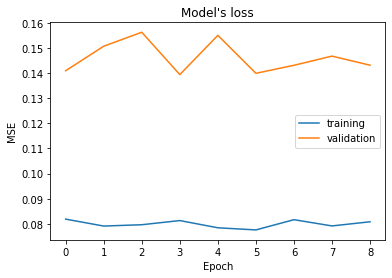

In [25]:
plt.title('Model\'s loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [26]:
from google.colab import files
files.download('best.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>